In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import *

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
meta = MetaData()

In [6]:
station = Table('station', meta, Column('date', Date), autoload_with=engine, extend_existing=True)
measurement = Table('measurement', meta, Column('date', Date), autoload_with=engine, extend_existing=True)

In [7]:
for c in measurement.columns:
    print(c, c.type)

for c in station.columns:
    print(c, c.type)

measurement.id INTEGER
measurement.station TEXT
measurement.date DATE
measurement.prcp FLOAT
measurement.tobs FLOAT
station.id INTEGER
station.station TEXT
station.name TEXT
station.latitude FLOAT
station.longitude FLOAT
station.elevation FLOAT
station.date DATE


In [8]:
session = Session(engine)

# Exploratory Climate Analysis

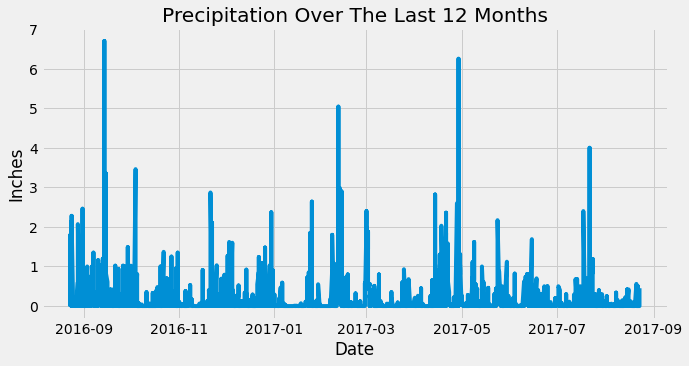

In [90]:
last_date = session.query(func.max(measurement.c.date)).first()[0]
year_ago = last_date - dt.timedelta(days=365)

prev_year_prcp = session.query(measurement.c.date, measurement.c.prcp).\
    filter(measurement.c.date >= year_ago).all()

df_prev_year_prcp = pd.DataFrame(prev_year_prcp, columns=['date','precipitation'])
df_prev_year_prcp.precipitation = df_prev_year_prcp.precipitation.fillna(0)

df_prev_year_prcp.set_index('date', inplace=True)

ax = df_prev_year_prcp.plot(kind='line', title='Precipitation Over The Last 12 Months', figsize=(10,5))
ax.set_ylabel('Inches')
ax.set_xlabel('Date')
ax.get_legend().remove()

plt.show()

In [91]:
df_prev_year_prcp.describe()

,precipitation
count,2230.000000
mean,0.160664
std,0.442067
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,6.700000


In [ ]:
# Design a query to show how many stations are available in this dataset?


In [ ]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.


In [ ]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?


In [ ]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
